In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
os.chdir('/Users/jenna/c4sf/homeless/C4SF-datasci-homeless/processed/')
data = pd.read_csv('homeless_row_per_enrollment_one_hot_encode.csv')
data.shape
data.head()

/Users/jenna/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(58209, 91)

,Personal ID,veteran_status,client_age_at_entry,entry_date,exit_date,disabling_condition,continuously_homeless_one_year,times_homeless_past_three_years,months_homeless_this_time,chronic_homeless,in_permanent_housing,residential_move_in_date,domestic_violence_victim,months_ago_dv_occurred,dv_currently_fleeing,days_enrolled,days_to_residential_move_in,head_of_household,race_other,race_pacificisl,race_black,race_asian,race_unknown,race_amerindian,race_white,ethnicity_nonlatino,ethnicity_unknown,ethnicity_latino,gender_transftom,gender_transmtof,gender_male,gender_female,gender_other,gender_unknown,housing_status_project_start_cat4fleeingdv,housing_status_project_start_unknown,housing_status_project_start_cat1homeless,housing_status_project_start_cat2risklosing,housing_status_project_start_cat3homelessfedstatutes,housing_status_project_start_atrisk,housing_status_project_start_housed,living_situation_before_program_entry_unknown,living_situation_before_program_entry_permanenthousing,living_situation_before_program_entry_rentalvash,living_situation_before_program_entry_hotel,living_situation_before_program_entry_family,living_situation_before_program_entry_friend,living_situation_before_program_entry_streets,living_situation_before_program_entry_owned,living_situation_before_program_entry_detoxcenter,living_situation_before_program_entry_safehaven,living_situation_before_program_entry_hospital,living_situation_before_program_entry_jail,living_situation_before_program_entry_rentalother,living_situation_before_program_entry_transitionalhousing,living_situation_before_program_entry_rental,living_situation_before_program_entry_other,living_situation_before_program_entry_rentalgdptip,living_situation_before_program_entry_ownedsubsidy,living_situation_before_program_entry_longtermcare,living_situation_before_program_entry_hospitalpsych,living_situation_before_program_entry_foster,living_situation_before_program_entry_halfwayhouse,living_situation_before_program_entry_emershelter,noncash_benefit_tanfchildcare,noncash_benefit_publichousing,noncash_benefit_foodstamps,noncash_benefit_tanfother,noncash_benefit_none,noncash_benefit_tanftransportation,noncash_benefit_other,noncash_benefit_wic,noncash_benefit_temprental,disability_type_alcohol,disability_type_substance,disability_type_mentalhealth,disability_type_hivaids,disability_type_developmental,disability_type_drug,disability_type_alcoholdrug,disability_type_none,disability_type_physical,disability_type_chronichealth,project_type_code_emergencyshelter,project_type_code_other,project_type_code_streetoutreach,project_type_code_servicesonly,project_type_code_rapidrehousing,project_type_code_transitionalhousing,project_type_code_permanentsupportivehousing,project_type_code_homelessnessprevention
0,214224,False,60,2012-01-01,2013-09-08,True,False,NaN,NaN,False,False,NaN,False,NaN,False,616,NaN,False,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,194592,True,53,2012-01-02,2013-08-31,True,False,NaN,NaN,False,False,NaN,False,NaN,False,607,NaN,False,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,179384,False,50,2012-01-03,2016-01-28,False,False,NaN,NaN,False,False,NaN,False,NaN,False,1486,NaN,True,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,183019,False,28,2012-01-03,2012-10-26,False,False,NaN,NaN,False,False,NaN,False,NaN,False,297,NaN,False,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,182885,False,48,2012-01-04,2013-05-02,False,False,NaN,NaN,False,False,NaN,False,NaN,False,484,NaN,False,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,

In [3]:
# count number of years per person
data['entry_date'] = pd.to_datetime(data['entry_date'])
data['entry_year'] = data['entry_date'].dt.year
data.head()

,Personal ID,veteran_status,client_age_at_entry,entry_date,exit_date,disabling_condition,continuously_homeless_one_year,times_homeless_past_three_years,months_homeless_this_time,chronic_homeless,in_permanent_housing,residential_move_in_date,domestic_violence_victim,months_ago_dv_occurred,dv_currently_fleeing,days_enrolled,days_to_residential_move_in,head_of_household,race_other,race_pacificisl,race_black,race_asian,race_unknown,race_amerindian,race_white,ethnicity_nonlatino,ethnicity_unknown,ethnicity_latino,gender_transftom,gender_transmtof,gender_male,gender_female,gender_other,gender_unknown,housing_status_project_start_cat4fleeingdv,housing_status_project_start_unknown,housing_status_project_start_cat1homeless,housing_status_project_start_cat2risklosing,housing_status_project_start_cat3homelessfedstatutes,housing_status_project_start_atrisk,housing_status_project_start_housed,living_situation_before_program_entry_unknown,living_situation_before_program_entry_permanenthousing,living_situation_before_program_entry_rentalvash,living_situation_before_program_entry_hotel,living_situation_before_program_entry_family,living_situation_before_program_entry_friend,living_situation_before_program_entry_streets,living_situation_before_program_entry_owned,living_situation_before_program_entry_detoxcenter,living_situation_before_program_entry_safehaven,living_situation_before_program_entry_hospital,living_situation_before_program_entry_jail,living_situation_before_program_entry_rentalother,living_situation_before_program_entry_transitionalhousing,living_situation_before_program_entry_rental,living_situation_before_program_entry_other,living_situation_before_program_entry_rentalgdptip,living_situation_before_program_entry_ownedsubsidy,living_situation_before_program_entry_longtermcare,living_situation_before_program_entry_hospitalpsych,living_situation_before_program_entry_foster,living_situation_before_program_entry_halfwayhouse,living_situation_before_program_entry_emershelter,noncash_benefit_tanfchildcare,noncash_benefit_publichousing,noncash_benefit_foodstamps,noncash_benefit_tanfother,noncash_benefit_none,noncash_benefit_tanftransportation,noncash_benefit_other,noncash_benefit_wic,noncash_benefit_temprental,disability_type_alcohol,disability_type_substance,disability_type_mentalhealth,disability_type_hivaids,disability_type_developmental,disability_type_drug,disability_type_alcoholdrug,disability_type_none,disability_type_physical,disability_type_chronichealth,project_type_code_emergencyshelter,project_type_code_other,project_type_code_streetoutreach,project_type_code_servicesonly,project_type_code_rapidrehousing,project_type_code_transitionalhousing,project_type_code_permanentsupportivehousing,project_type_code_homelessnessprevention,entry_year
0,214224,False,60,2012-01-01,2013-09-08,True,False,NaN,NaN,False,False,NaN,False,NaN,False,616,NaN,False,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2012
1,194592,True,53,2012-01-02,2013-08-31,True,False,NaN,NaN,False,False,NaN,False,NaN,False,607,NaN,False,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2012
2,179384,False,50,2012-01-03,2016-01-28,False,False,NaN,NaN,False,False,NaN,False,NaN,False,1486,NaN,True,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012
3,183019,False,28,2012-01-03,2012-10-26,False,False,NaN,NaN,False,False,NaN,False,NaN,False,297,NaN,False,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2012
4,182885,False,48,2012-01-04,2013-05-02,False,False,NaN,NaN,False,False,NaN,False,NaN,False,484,NaN,False,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
## run outside of jupyter so it doesn't crash.

data_perm_housing_date = data[['Personal ID', 'entry_date', 'entry_year', 'in_permanent_housing']]

print data_perm_housing_date.head()

data_perm_housing_date.sort_values(by=['Personal ID', 'entry_date'], inplace=True)
data_perm_housing_date.reset_index(drop=True, inplace=True)
data_perm_housing_date['repeat'] = 0
print data_perm_housing_date.head(n=5)


print data_perm_housing_date.shape

for i in np.arange(1, data_perm_housing_date.shape[0]):
    print i
    if i in (10000, 20000, 30000, 40000, 50000):
        print i
    if (data_perm_housing_date.loc[i, 'Personal ID'] == data_perm_housing_date.loc[i-1, 'Personal ID']) \
        and (data_perm_housing_date.loc[i, 'in_permanent_housing'] == data_perm_housing_date.loc[i-1, 'in_permanent_housing']):
        data_perm_housing_date.loc[i, 'repeat'] = 1

data_perm_housing_date.to_csv('/Users/jenna/c4sf/homeless/C4SF-datasci-homeless/data_perm_housing_date_with_repeat_flag.csv', header=True, index=False)

data_perm_housing_date_changes_only = data_perm_housing_date.ix[ data_perm_housing_date['repeat']==0]

data_perm_housing_date_changes_only.to_csv('/Users/jenna/c4sf/homeless/C4SF-datasci-homeless/data_perm_housing_date_changes_only.csv', header=True, index=False)

In [6]:
data_perm_housing_changes = pd.read_csv('/Users/jenna/c4sf/homeless/C4SF-datasci-homeless/data_perm_housing_date_changes_only.csv')
data_perm_housing_changes.head(n=15)

,Personal ID,entry_date,entry_year,in_permanent_housing,repeat
0,173781,2014-02-28,2014,False,0
1,173782,2014-05-06,2014,False,0
2,173783,2014-05-06,2014,False,0
3,173803,2013-02-08,2013,False,0
4,173804,2013-02-08,2013,False,0
5,173805,2013-02-08,2013,False,0
6,173848,2013-06-07,2013,False,0
7,173849,2013-06-07,2013,False,0
8,173885,2014-04-25,2014,False,0
9,173899,2015-03-20,2015,False,0


In [121]:
print 'Total Number of Rows = ', data_perm_housing_changes.shape[0]
print 'Total Number of People = ', data_perm_housing_changes['Personal ID'].nunique()
print '\n'

num_records_per_person = data_perm_housing_changes.groupby(data_perm_housing_changes['Personal ID']).count()
#num_records_per_person.head()

num_records_per_person.reset_index(inplace=True)
#num_records_per_person.head()

num_records_per_person_sub = num_records_per_person[['Personal ID', 'repeat']]
num_records_per_person_sub.columns = ['Personal ID', 'num_records']
#num_records_per_person_sub.head()
#print 'Total Number of People = ', num_records_per_person_sub.shape[0]

# Merge data with the number of times each person shows up in the list
data_with_count = data_perm_housing_changes.merge(num_records_per_person_sub, left_on = 'Personal ID', right_on = 'Personal ID')
#print data_with_count.head()
#print data_with_count.shape

people_with_1_record = data_with_count.loc[ data_with_count['num_records']==1 ]
#print people_with_1_record.head()
print '***'
print 'Total Number of People with no change in housing status = ', people_with_1_record.shape

one_record_not_perm_housing = people_with_1_record.loc[ people_with_1_record['in_permanent_housing'] == False].shape[0]
one_record_in_perm_housing = people_with_1_record.loc[ people_with_1_record['in_permanent_housing'] == True].shape[0]

print 'Of those, ', one_record_not_perm_housing, 'are not in permanent housing'
print 'Of those, ', one_record_in_perm_housing, 'are in permanent housing'
print '***'
print '\n'
print '***'

people_with_multiple_records = data_with_count.loc[ data_with_count['num_records']>1 ]
print 'Total Number of people with change in housing status = ', people_with_multiple_records['Personal ID'].nunique()
people_with_multiple_records.head()

print people_with_multiple_records['num_records'].max()

# of those who show up more than once -- did they go from in to out or out to in

Total Number of Rows =  11776
Total Number of People =  11362


***
Total Number of People with no change in housing status =  (10975, 6)
Of those,  10189 are not in permanent housing
Of those,  786 are in permanent housing
***


***
Total Number of people with change in housing status =  387


,Personal ID,entry_date,entry_year,in_permanent_housing,repeat,num_records
83,174757,2012-08-17,2012,False,0,2
84,174757,2014-10-01,2014,True,0,2
110,175160,2012-09-20,2012,False,0,2
111,175160,2015-06-11,2015,True,0,2
147,175850,2012-09-19,2012,False,0,2


5


(11776, 6)
11362


/Users/jenna/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4affd0>]], dtype=object)

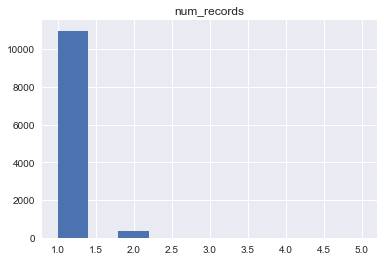

In [124]:
print data_with_count.shape
print data_with_count['Personal ID'].nunique()

data_with_count_sub = data_with_count[['Personal ID', 'num_records']]
data_with_count_sub.drop_duplicates(inplace=True)
data_with_count_sub.hist(column = 'num_records')

In [125]:
# values of histogram
pd.cut(data_with_count_sub['num_records'], 5).value_counts().sort_index()

(0.996, 1.8]    10975
(1.8, 2.6]        367
(2.6, 3.4]         14
(3.4, 4.2]          5
(4.2, 5]            1
Name: num_records, dtype: int64

In [114]:
# Of those with only 2 records, did they start in or out of housing?
people_with_2_records = data_with_count.loc[ data_with_count['num_records']==2 ]

print 'Number of people with 2 records = ', people_with_2_records['Personal ID'].nunique()

people_with_2_records.sort_values(by=['Personal ID', 'entry_date'], inplace=True)

first_entry = people_with_2_records.groupby('Personal ID').first().reset_index()
first_entry.head()

first_entry_counts = first_entry['Personal ID'].groupby(first_entry['in_permanent_housing']).count().reset_index()
first_entry_counts.head()
print first_entry_counts.loc[first_entry_counts['in_permanent_housing']==False, 'Personal ID'].values

print 'Of the ', people_with_2_records['Personal ID'].nunique(), 'people with 2 records, ', \
first_entry_counts.loc[first_entry_counts['in_permanent_housing']==False, 'Personal ID'].values[0], 'started NOT in permanent housing'


print 'Of the ', people_with_2_records['Personal ID'].nunique(), 'people with 2 records, ', \
people_with_2_records['Personal ID'].nunique() - first_entry_counts.loc[first_entry_counts['in_permanent_housing']==False, 'Personal ID'].values[0], \
'started IN permanent housing and then left it'

Number of people with 2 records =  367


/Users/jenna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Personal ID,entry_date,entry_year,in_permanent_housing,repeat,num_records
0,174757,2012-08-17,2012,False,0,2
1,175160,2012-09-20,2012,False,0,2
2,175850,2012-09-19,2012,False,0,2
3,176927,2013-07-23,2013,False,0,2
4,176984,2013-04-01,2013,False,0,2


(367, 6)

,in_permanent_housing,Personal ID
0,False,353
1,True,14


[353]
Of the  367 people with 2 records,  353 started NOT in permanent housing
Of the  367 people with 2 records,  14 started IN permanent housing and then left it


In [115]:
# Of those with more than 2 records, did they start in or out of housing?
people_with_gt2_records = data_with_count.loc[ data_with_count['num_records']>2 ]

print 'Number of people with >2 records = ', people_with_gt2_records['Personal ID'].nunique()

people_with_gt2_records.sort_values(by=['Personal ID', 'entry_date'], inplace=True)

first_entry_gt2 = people_with_gt2_records.groupby('Personal ID').first().reset_index()
first_entry_gt2.head()

first_entry_counts_gt2 = first_entry_gt2['Personal ID'].groupby(first_entry_gt2['in_permanent_housing']).count().reset_index()
first_entry_counts_gt2.head()
print first_entry_counts_gt2.loc[first_entry_counts_gt2['in_permanent_housing']==False, 'Personal ID'].values

print 'Of the ', people_with_gt2_records['Personal ID'].nunique(), 'people with >2 records, ', \
first_entry_counts_gt2.loc[first_entry_counts_gt2['in_permanent_housing']==False, 'Personal ID'].values[0], 'started NOT in permanent housing'


print 'Of the ', people_with_gt2_records['Personal ID'].nunique(), 'people with >2 records, ', \
people_with_gt2_records['Personal ID'].nunique() - first_entry_counts_gt2.loc[first_entry_counts_gt2['in_permanent_housing']==False, 'Personal ID'].values[0], \
print data_with_count.loc[ data_with_count['num_records']==3 , 'Personal ID'].nunique()print data_with_count.loc[ data_with_count['num_records']==3 , 'Personal ID'].nunique()'started IN permanent housing'

Number of people with >2 records =  20


/Users/jenna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Personal ID,entry_date,entry_year,in_permanent_housing,repeat,num_records
0,182354,2013-08-14,2013,False,0,3
1,184551,2014-01-30,2014,False,0,4
2,213093,2013-03-29,2013,False,0,4
3,213342,2012-10-18,2012,False,0,4
4,215999,2014-01-06,2014,False,0,3


,in_permanent_housing,Personal ID
0,False,16
1,True,4


[16]
Of the  20 people with >2 records,  16 started NOT in permanent housing
Of the  20 people with >2 records,  4 started IN permanent housing and then left it


In [128]:
people_with_gt2_records.head()

,Personal ID,entry_date,entry_year,in_permanent_housing,repeat,num_records
658,182354,2013-08-14,2013,False,0,3
659,182354,2014-01-15,2014,True,0,3
660,182354,2015-12-07,2015,False,0,3
900,184551,2014-01-30,2014,False,0,4
901,184551,2014-02-21,2014,True,0,4


In [ ]:
people_with_gt2_records.to_csv('/Users/jenna/c4sf/homeless/C4SF-datasci-homeless/people_with gt2_records.csv', header=True, index=False)

In [118]:
print data_with_count.loc[ data_with_count['num_records']==1 , 'Personal ID'].nunique()
print data_with_count.loc[ data_with_count['num_records']==2 , 'Personal ID'].nunique()
print data_with_count.loc[ data_with_count['num_records']==3 , 'Personal ID'].nunique()
print data_with_count.loc[ data_with_count['num_records']==4 , 'Personal ID'].nunique()
print data_with_count.loc[ data_with_count['num_records']==5 , 'Personal ID'].nunique()

10975
367
14
5
1


# Conclusions

Total Number of People = 11,362
	— 10,189 were not in permanent housing the whole time
	— 786 were in permanent housing the whole time
	— 387 changed housing status
		— 367 had only two housing statuses
			— 353 started not in permanent housing and then got in permanent housing
			— 14 started in permanent housing and then left
		— 20 had several changes in housing status
			— 16 started not in permanent housing
				— 4 people got permanent housing
				— 12 people got it and then lost it
			— 4 started in permanent housing
				— all left it and then got back in

Summary Stats:
	— Out of (10,189 + 353 + 16) 10,558 who started without permanent housing, 353 got permanent housing (3%) and stayed there
	— Out of (10,189 + 353 + 16) 10,558 who started without permanent housing, 4 got permanent housing (0.03%), lost it but then stayed
	— Out of (10,189 + 353 + 16) 10,558 who started without permanent housing, 12 got permanent housing (0.1%) but lost it
	
	— Out of (786 + 14 + 4) 804 people who started in permanent housing, 786 stayed there the whole time (97.7%)
	— Out of (786 + 14 + 4) 804 people who started in permanent housing, 14 left it (1.7%)
	— Out of (786 + 14 + 4) 804 people who started in permanent housing, 4 left it but then got back in (0.5%)

Conclusions:
	- most people had the same label the whole time (786+10189) 10,975 out of 11,362 (96.5%)
	- recidivism is so low that we can’t really look at ‘reduced recidivism’ and how/if it changes over time
	- of people who left homelessness, less than 5% become homeless again within 2 years
		- (353 + 4 + 12) 369 left homeless, and 12 (3.2%) people went back  — YES
	- a reduction of 20% of those people who left their homelessness situation but return within 2 years, compared to the preceding fiscal year
		- but there are only 12 people total so we shouldn’t look at how it changes over time

Caveats:
	- we do not know what happens to people if they don’t come back to one of these programs 